### list of laTex mathematical symbols
https://oeis.org/wiki/List_of_LaTeX_mathematical_symbols

https://towardsdatascience.com/a-beginners-guide-to-xgboost-87f5d4c30ed7

https://machinelearningmastery.com/gentle-introduction-xgboost-applied-machine-learning/

XGBoost is an implementation of gradient boosted decision trees designed for speed and performance.

XGBoost stands for eXtreme Gradient Boosting. The library is laser focused on computational speed and model performance

The XGBoost library implements the gradient boosting decision tree algorithm. Boosting is an ensemble technique where new models are added to correct the errors made by existing models. Models are added sequentially until no further improvements can be made

Gradient boosting is an approach where new models are created that predict the residuals or errors of prior models and then added together to make the final prediction. It is called gradient boosting because it uses a gradient descent algorithm to minimize the loss when adding new models.

This approach supports both regression and classification predictive modeling problems.


In [3]:
from sklearn import datasets
import xgboost as xgb
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [33]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [34]:
X[:3]
X.shape
y[:2]
y.shape

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

(150, 4)

array([0, 0])

(150,)

In [35]:
np.unique(y) # 3 classes

array([0, 1, 2])

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape
X_test.shape

(120, 4)

(30, 4)

In [37]:
D_train = xgb.DMatrix(X_train, label=y_train)
D_test = xgb.DMatrix(X_test, label=y_test)


In [38]:
# xgb.DMatrix?

In [39]:
param = {
    'eta': 0.3, 
    'max_depth': 3,  
    'objective': 'multi:softprob',  
    'num_class': 3} 

steps = 20  # The number of training iterations
# the eta parameter gives us a chance to prevent this overfitting

In [40]:
model = xgb.train(param, D_train, steps)

In [41]:
model

In [42]:
preds = model.predict(D_test)
best_preds = np.asarray([np.argmax(line) for line in preds])

print("Precision = {}".format(precision_score(y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, best_preds)))

Precision = 0.9629629629629629
Recall = 0.9696969696969697
Accuracy = 0.9666666666666667


In [43]:
preds[:2]
np.argmax([0.00397916, 0.00534278, 0.9906781 ])
np.argmin([0.9873663 , 0.00928136, 0.00335236])

array([[0.02856225, 0.93447435, 0.03696341],
       [0.991105  , 0.0056595 , 0.00323542]], dtype=float32)

2

2

In [14]:
best_preds

array([1, 0, 1, 2, 1, 1, 1, 0, 2, 1, 1, 1, 0, 2, 0, 1, 2, 2, 0, 0, 0, 0,
       1, 1, 0, 2, 1, 0, 2, 1])

In [15]:
np.unique(best_preds)

array([0, 1, 2])

In [16]:
X_test[:3]
X_test.shape
model.feature_names

array([[6.1, 2.8, 4.7, 1.2],
       [4.4, 2.9, 1.4, 0.2],
       [5.5, 2.6, 4.4, 1.2]])

(30, 4)

['f0', 'f1', 'f2', 'f3']

The gamma parameter can also help with controlling overfitting. It specifies the minimum reduction in the loss required to make a further partition on a leaf node of the tree. I.e if creating a new node doesn’t reduce the loss by a certain amount, then we won’t create it at all.

The booster parameter allows you to set the type of model you will use when building the ensemble. The default is gbtree which builds an ensemble of decision trees. If your data isn’t too complicated, you can go with the faster and simpler gblinear option which builds an ensemble of linear models.

In [17]:
from sklearn.model_selection import GridSearchCV

clf = xgb.XGBClassifier()
parameters = {
     "eta"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
     "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
     "min_child_weight" : [ 1, 3, 5, 7 ],
     "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
     "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
     }

grid = GridSearchCV(clf,
                    parameters, n_jobs=4,
                    scoring="neg_log_loss",
                    cv=3)

grid.fit(X_train, y_train)

/projects/da_workspace/software/miniconda/envs/ai/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_l...
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=4,
             param_grid={'colsample_bytree': [0.3, 0.4, 0.5, 0.7],
                         'eta': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
                         'gamma': [0.0, 0

In [18]:
model.dump_model('dump.raw.txt')

In [19]:
model.feature_names
model

['f0', 'f1', 'f2', 'f3']

In [32]:

X_train.shape
df = pd.DataFrame(X_train)
df.columns = ['f0', 'f1', 'f2', 'f3']
df.head(2)
df[df.f2<2.4500005][:5]

NameError: name 'X_train' is not defined

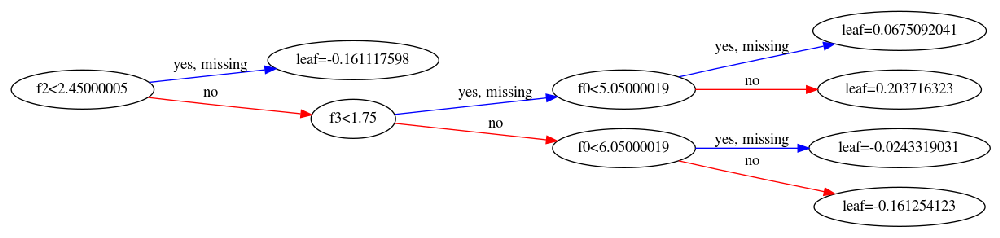

In [20]:
# visualize the first tree using DOT language, f2 means the third feature
# X has four features, f0, f1, f2, f3, but why the leaves are not always equal to 3? should it not be just 3 classes?
# what are the values in the leaves?
# This is a 3 classes classification problem, why do I see 5 leaves?

f, ax = plt.subplots(figsize=(14, 6))
xgb.plot_tree(model, num_trees=10, rankdir='LR', ax=ax)
plt.tight_layout()
plt.show()

In [55]:
preds = model.predict(D_test)
best_preds = np.asarray([np.argmax(line) for line in preds])
print("Precision = {}".format(precision_score(y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, best_preds)))

Precision = 0.9523809523809524
Recall = 0.9444444444444445
Accuracy = 0.9333333333333333


In [56]:
model

After some google searches, it looks the score in the leaf is a score before transformation to probability, 

https://stats.stackexchange.com/a/406605/112141.

From my understanding, the number of leaves is not relevant to the number of classes. Decision trees are usually binary, a single tree only considers two classes (let's say 0/1), each leaf corresponds to the probability of P(Y=1), then P(Y=0) is simply 1 - P(Y=1).

When it comes to multi-class classification, the common way is to convert it into multiple binary classification problems. The two most common approaches are one-vs-all (OVA, aka one-vs-rest), and one-vs-one (OVO).

For an N-classification problem, in OVA, a model is trained for each class with the rest classes trained as one class, so N models are trained; In OVO, a model is trained for each pair of classes, so N * (N - 1) / 2 models are trained. In both approaches, the predictions from individual models are aggregated somehow (e.g. the simplest is voting). I recall seeing a paper where people try to evaluate the different methods for aggregating the predictions, e.g. https://www.sciencedirect.com/science/article/abs/pii/S0031320311000458?via%3Dihub

Best,
Zhuyi

### second example
predict wage class, if a person earn >=50k salary?

In [4]:
# prepare dataset

train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)
test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test',
                      skiprows = 1, header = None) # Make sure to skip a row for the test set

# since the downloaded data has no header, I need to add the headers manually
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
             'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

# 1. replace ' ?' with nan
# 2. drop all nan
train_noNan = train_set.replace(' ?', np.nan).dropna()
test_noNan  = test_set.replace(' ?', np.nan).dropna()

# replace ' <=50K.' with ' <=50K', and ' >50K.' with ' >50K' in wage_class
test_noNan['wage_class'] = test_noNan.wage_class.replace(
  {' <=50K.'  : ' <=50K',
  ' >50K.'    : ' >50K'
  })

# encode training and test dataset together
combined_set = pd.concat([train_noNan, test_noNan], axis=0)
#
for feature in combined_set.columns:
  # cetegorical feature columns will have dtype = object
  if combined_set[feature].dtype == 'object':
    combined_set[feature] = pd.Categorical(combined_set[feature]).codes 
    # replace string with integer; this simply counts the 
    # of unique values in a column and maps it to an integer
combined_set.head()

# separate train and test
final_train = combined_set[:train_noNan.shape[0]]
final_test  = combined_set[train_noNan.shape[0]:]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0


In [5]:
# separate feature and label
y_train = final_train.pop('wage_class')
y_test  = final_test.pop('wage_class')

In [6]:
final_train[:2]
y_train[:2]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38


0    0
1    0
Name: wage_class, dtype: int8

In [7]:
import xgboost as xgb
from xgboost import plot_tree
from sklearn.model_selection import GridSearchCV

# XGBoost has built-in CV, which can use early-stopping to prevent overfiting, therefore improve accuracy
## if not using sklearn, I can convert the data into DMatrix, 
# a XGBoost specific data structure for training and testing. 
# It is said DMatrix can improve the efficiency of the algorithm
xgdmat = xgb.DMatrix(final_train, y_train)

our_params = {
  'eta'             : 0.1,      # aka. learning_rate
  'seed'            : 0, 
  'subsample'       : 0.8, 
  'colsample_bytree': 0.8, 
  'objective'       : 'binary:logistic', 
  'max_depth'       :3,         # how many features to use before reach leaf
  'min_child_weight':1} 
# Grid Search CV optimized settings

# create XGBoost object using the parameters
final_gb = xgb.train(our_params, xgdmat, num_boost_round = 432)

/projects/da_workspace/software/miniconda/envs/ai/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/projects/da_workspace/software/miniconda/envs/ai/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [8]:
final_gb

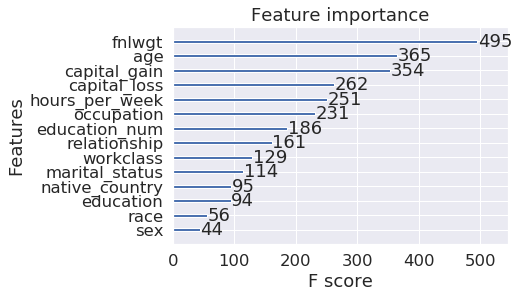

In [9]:
sns.set(font_scale = 1.5)
xgb.plot_importance(final_gb)
# after printing the importance of the features, 
# we need to put human insights and try to explain why each feature is important/not important

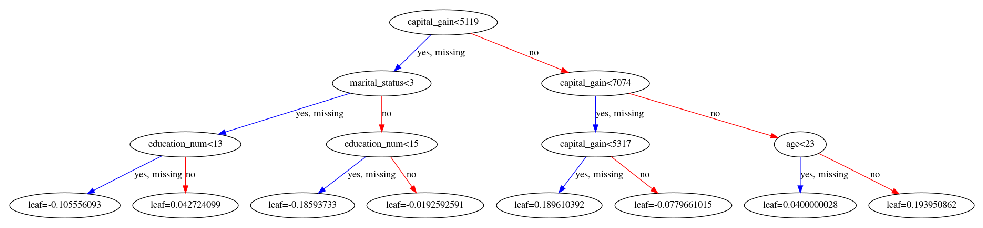

In [11]:
f, ax = plt.subplots(figsize=(14, 8))
xgb.plot_tree(final_gb, num_trees=0, ax=ax)
plt.tight_layout()
plt.show()

In [12]:
graph_to_save = xgb.to_graphviz(final_gb, num_trees = 0)
graph_to_save.format = 'png'            
graph_to_save.render('tree_0_saved')      # a tree_saved.png will be saved in the root directory

graph_to_save = xgb.to_graphviz(final_gb, num_trees = 1)
graph_to_save.format = 'png'            
graph_to_save.render('tree_1_saved')

'tree_0_saved.png'

'tree_1_saved.png'

https://stats.stackexchange.com/questions/395697/what-is-an-intuitive-interpretation-of-the-leaf-values-in-xgboost-base-learners/406605#406605

A gradient boosting machine (GBM), like XGBoost, is an ensemble learning technique where the results of the each base-learner are combined to generate the final estimate. That said, when performing a binary classification task, by default, XGBoost treats it as a logistic regression problem.

Refresher: Within the context of logistic regression, the mean of the binary response is of the form μ(X)=Pr(Y=1|X) and relates to the predictors X1,...,Xp through the logit function: log(μ(X)1−μ(X)) = β0+ β1X1+ ...+ βpXp. As a consequence, to get probability estimates we need to use the inverse logit (i.e. the logistic) link 11+e−(β0+β1X1+...+βpXp). In addition to that, we need to remember that boosting can be presented as a generalised additive model (GAM). In the case of a simple GAM our final estimates are of the form: g[μ(X)] = α+ f1(X1)+ ...+ fp(Xp), where g is our link function and f is a set of elementary basis functions (usually cubic splines). When boosting through, we change f and instead of some particular basis function family, we use the individual base-learners we mentioned originally! (See Hastie et al. 2009, Elements of Statistical Learning Chapt. 4.4 "Logistic Regression" and Chapt. 10.2 "Boosting Fits an Additive Model" for more details.)

In the case of a GBM therefore, the result from each individual tree are indeed combined together, but they are not probabilities (yet) but rather the estimates of the score before performing the logistic transformation done when performing logistic regression. For that reason the individual as well as the combined estimates show can naturally be negative; the negative sign simply implies "less" chance. OK, talk is cheap show me the code.

In [23]:
# Let's assume we have only two base-learner, that are simple stumps.

our_params = {
  'eta'             : 0.1,      # aka. learning_rate
  'seed'            : 0, 
  'subsample'       : 0.8, 
  'colsample_bytree': 0.8, 
  'objective'       : 'binary:logistic', 
  'max_depth'       : 1,         # Stumps
  'min_child_weight': 1} 

# create XGBoost object using the parameters
final_gb = xgb.train(our_params, xgdmat, num_boost_round = 2)

# And that we aim to predict the first four entries of our test-set.
xgdmat4 = xgb.DMatrix(final_test.iloc[0:4,:], y_test[0:4])
mypreds4 = final_gb.predict(data = xgdmat4)
# array([0.43447325, 0.46945405, 0.46945405, 0.5424156 ], dtype=float32)

/projects/da_workspace/software/miniconda/envs/ai/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/projects/da_workspace/software/miniconda/envs/ai/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [24]:
final_test.iloc[0:4,:]
y_test[0:4]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,25,2,226802,1,7,4,6,3,2,1,0,0,40,38
1,38,2,89814,11,9,2,4,0,4,1,0,0,50,38
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,38
3,44,2,160323,15,10,2,6,0,2,1,7688,0,40,38


0    0
1    0
2    1
3    1
Name: wage_class, dtype: int8

these predictions are probabilities, logistic function $ 1/(1+ e^{-x})$, it only predicts that the fourth person has a salary of >50k.

In [45]:
mypreds4

array([0.4343974, 0.4692223, 0.4692223, 0.5430394], dtype=float32)

# Plotting the two (sole) trees used:

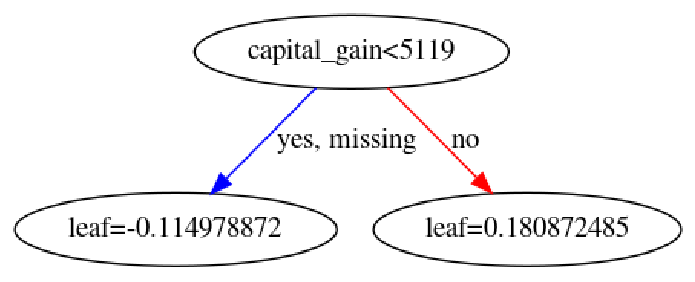

In [28]:
f, ax = plt.subplots(figsize=(10, 6))
xgb.plot_tree(final_gb, num_trees=0, ax=ax)
plt.tight_layout()
plt.show()

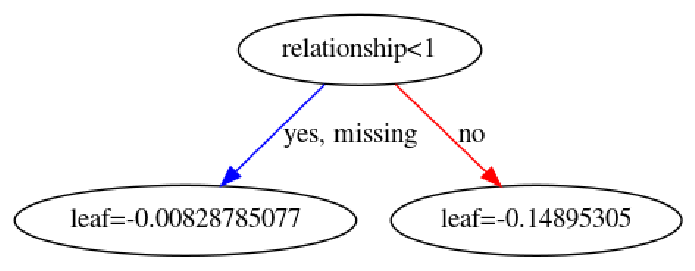

In [21]:
f, ax = plt.subplots(figsize=(10, 6))
xgb.plot_tree(final_gb, num_trees=1, ax=ax)
plt.tight_layout()
plt.show()

In [46]:
# Based on these diagrams and we can check that based on our initial sample:
final_test.iloc[0:4,:][['capital_gain','relationship']]

,capital_gain,relationship
0,0,3
1,0,0
2,0,0
3,7688,0


In [47]:
# We can directly calculate our own estimates manually based on the logistic function:
1/(1+ np.exp(-(-0.114978872 + -0.14895305))) # First entry 
# 0.4344732254087043
1/(1+ np.exp(-(-0.115036212 + -0.007299904))) # Second entry
# 0.4694540577007751
1/(1+ np.exp(-(-0.115036212 + -0.007299904))) # Third entry
# 0.4694540577007751
1/(1+ np.exp(-(+0.177371055 + -0.007299904))) # Fourth entry
# 0.5424156005710725

0.4343974015049583

0.4694540577007751

0.4694540577007751

0.5424156005710725

It can be easily seen that our manual estimates match (up to 7 digits) the ones we got directly from predict.

So to recap, the leaves contain the estimates from their respective base-learner on the domain of the function where the gradient boosting procedure takes place. For the presented binary classification task, the link used is the logit so these estimates represent log-odds; in terms of log-odds, negative values are perfectly normal. To get probability estimates we simply use the logistic function, which is the inverse of the logit function. Finally, please note that we need to first compute our final estimate in the gradient boosting domain and then transform it back. Tranforming the output of each base-learner individually and then combining these outputs is wrong because the linearity relation shown does not (necessarily) hold in the domain of the response variable.

For more information about the logit I would suggest reading the excellent CV.SE thread on Interpretation of simple predictions to odds ratios in logistic regression.